In [1]:
import numpy as np 
import pandas as pd 
from sklearn.svm import SVR
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [2]:
df2 = pd.read_excel(r"C:\Users\madam\Desktop\2805 RF Dataset.xlsx")
df2.head(10)

,SB,HB,BD,TB,Pf(kg/m3),XB(m),E(GPa),X50(m)
0,1.198974,1.366301,27.254728,0.736923,0.495592,0.576549,59.946268,0.341959
1,1.145491,1.303856,27.294058,0.762451,0.455873,0.612741,60.002893,0.386073
2,1.242155,1.317184,27.248093,0.896496,0.501227,0.994937,60.042361,0.358173
3,1.277583,1.316653,27.302029,0.727691,0.439071,1.093234,60.066082,0.453862
4,1.283793,1.359817,27.324111,0.812233,0.494853,1.122299,59.986148,0.525007
5,1.137211,1.267463,27.255258,1.130826,0.191363,1.027699,60.071748,0.325223
6,1.222616,1.287768,27.284017,1.038274,0.247066,1.114247,60.039518,0.592164
7,1.218804,1.370881,27.363819,0.916976,0.420132,1.187189,59.918973,0.463019
8,1.184350,1.321649,27.299174,0.772283,0.367255,1.087355,60.014646,0.278531
9,1.189903,1.306379,27.314142,1.038347,0.347422,1.146131,60.030522,0.421951


In [3]:
df2.shape

(2805, 8)

In [4]:
X = df2.drop(columns=['X50(m)'])
y = df2['X50(m)']
X.shape, y.shape

((2805, 7), (2805,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((2103, 7), (702, 7))

In [6]:
et_model = ExtraTreesRegressor(n_estimators=1000, max_depth=10)
cv = KFold(n_splits=5)
score = cross_val_score(et_model, X_train,y_train, cv=cv,scoring='r2')
et_model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=10, n_estimators=1000)

In [7]:
y_pred = et_model.predict(X_train)
r2=r2_score(y_train, y_pred)
r2

0.9256013535263907

In [8]:
y_pred = et_model.predict(X_test)
r2=r2_score(y_test, y_pred)
r2

0.8558910475519549

In [7]:
import optuna

d:\projects\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators',10,2000),
        'max_depth': trial.suggest_int('max_depth',1,30),
    
        
    }
        
    model = ExtraTreesRegressor(**param)
    cv = KFold(n_splits=5, shuffle=True)
    score = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, scoring='r2')   
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return r2_score(y_test, preds)

In [9]:
if __name__ == "__main__":
    storage = optuna.storages.InMemoryStorage()
    study = optuna.create_study(directions=['maximize'],
                               study_name='TPE-ET')
    study.optimize(objective, n_trials=50)

[I 2024-10-14 17:43:04,125] A new study created in memory with name: TPE-ET
[I 2024-10-14 17:43:09,531] Trial 0 finished with value: 0.8541227387231578 and parameters: {'n_estimators': 101, 'max_depth': 26}. Best is trial 0 with value: 0.8541227387231578.
[I 2024-10-14 17:43:30,184] Trial 1 finished with value: 0.8539536227194214 and parameters: {'n_estimators': 1800, 'max_depth': 30}. Best is trial 0 with value: 0.8541227387231578.
[I 2024-10-14 17:43:47,012] Trial 2 finished with value: 0.8569758913984273 and parameters: {'n_estimators': 1666, 'max_depth': 14}. Best is trial 2 with value: 0.8569758913984273.
[I 2024-10-14 17:43:49,233] Trial 3 finished with value: 0.6352290589894682 and parameters: {'n_estimators': 335, 'max_depth': 4}. Best is trial 2 with value: 0.8569758913984273.
[I 2024-10-14 17:44:07,775] Trial 4 finished with value: 0.8542109741125028 and parameters: {'n_estimators': 1845, 'max_depth': 19}. Best is trial 2 with value: 0.8569758913984273.
[I 2024-10-14 17:44:25

In [10]:
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8589681038233217
Best hyperparameters: {'n_estimators': 559, 'max_depth': 12}


In [18]:
et_model2 = ExtraTreesRegressor(n_estimators=559, max_depth=12)
cv = KFold(n_splits=5, shuffle=True)
score = cross_val_score(et_model2, X_train, y_train, cv=cv, n_jobs=-1, scoring='r2')   
et_model2.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=12, n_estimators=559)

In [19]:
preds = et_model2.predict(X_test)

In [20]:
pred = et_model2.predict(X_train)

In [21]:
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
mae = mean_absolute_error(y_train, pred)
evs = explained_variance_score(y_train, pred)
print('r2 is:', r2)
print('mse is:', mse)
print('mae is:', mae)
print('evs is:', evs)

r2 is: 0.9606589369875973
mse is: 0.0010726414662273554
mae is: 0.0241907266861668
evs is: 0.9606589369875973


In [22]:
r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
evs = explained_variance_score(y_test, preds)
print('r2 is:', r2)
print('mse is:', mse)
print('mae is:', mae)
print('evs is:', evs)

r2 is: 0.8579496372553913
mse is: 0.0034986106018867315
mae is: 0.045043297108853964
evs is: 0.8585143756335001


In [29]:
import pickle
import gzip
with gzip.open ('et_model2.pkl.gz', 'wb') as f:
    pickle.dump(et_model2, f, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
import shap

shap.initjs()

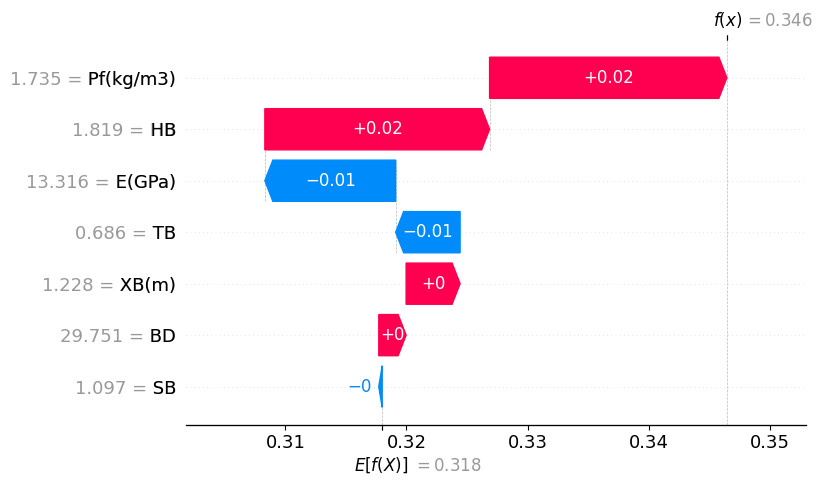

In [26]:
# ex = shap.TreeExplainer(et_model)
# shap_values = ex.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)
explainer = shap.Explainer(et_model)
shap_values = explainer(X_test)

shap.waterfall_plot(shap_values[0])

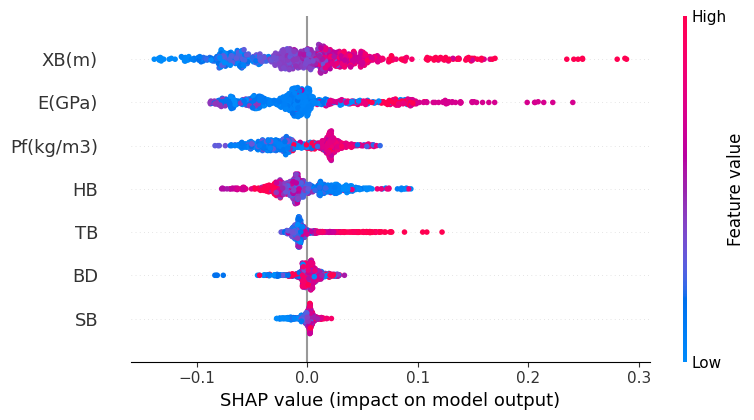

In [27]:
shap.summary_plot(shap_values, X_test)

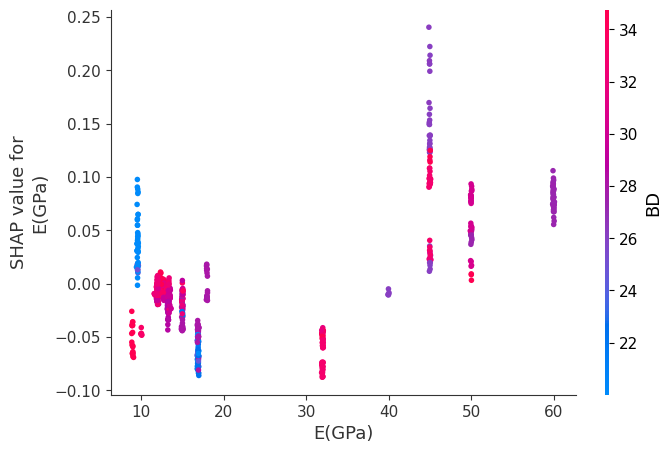

In [17]:
shap.dependence_plot('E(GPa)', shap_values, X_test)

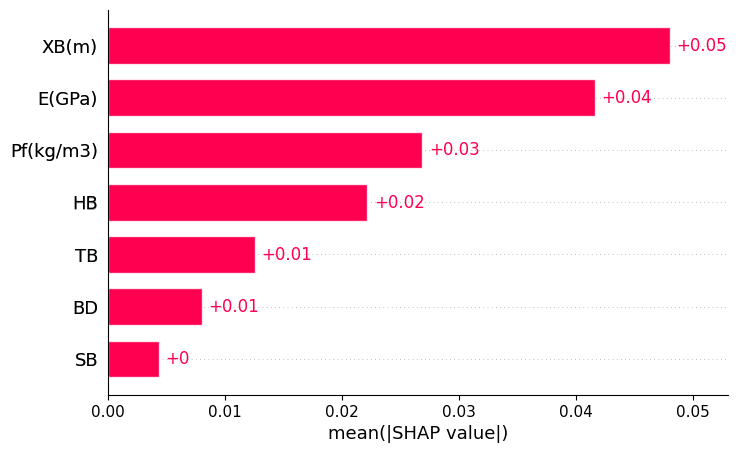

In [29]:
shap.plots.bar(shap_values)

In [24]:
import pickle
filename = 'ET-model.pkl'
pickle.dump(et_model, open(filename, 'wb'))

## GOA_GWO-HGB Optimization 

In [24]:
from mealpy import FloatVar, StringVar, IntegerVar, BoolVar, MixedSetVar, PSO, GWO, GOA, FFA, Problem
from mealpy.utils.visualize import *
from mealpy.utils import io

In [25]:
def objective_function(params):
    params = params.reshape(-1)
    params_dict = {
        'criterion': 'poisson',
        'n_estimators': int(params[0]),
        'max_depth': int(params[1]),
    }
    ET_model = ExtraTreesRegressor(**params_dict, random_state=42)
    #cv = KFold(n_splits=5)
    #cv_score  = cross_val_score(hgb, X_train, y_train, cv=cv, scoring='r2')
    ET_model.fit(X_train, y_train)
    y_pred =  ET_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

In [26]:
bounds = [(10, 2000), # Lower and upper bounds for max_iter (0)
          (2, 30), # Lower and upper bounds for max_depth (1)
           ]

# Define the problem dictionary for the optimizer
problem_dict = {
    "bounds": FloatVar(lb=np.array([bound[0] for bound in bounds]), ub=np.array([bound[1] for bound in bounds]), name="delta"),
    "obj_func": objective_function,
    "minmax": "max", # Minimize fitness (negative F1_Score)
}

In [27]:
model = FFA.OriginalFFA(epoch=10, pop_size=50)
g_best = model.solve(problem_dict)

2024/10/14 06:09:16 PM, INFO, mealpy.swarm_based.FFA.OriginalFFA: Solving single objective optimization problem.


KeyboardInterrupt: 

In [50]:
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

Solution: [5.15628301e+01 9.46789733e+00 1.04309869e+01 1.88326470e+02
 1.06399937e-01 3.00927667e+01], Fitness: 0.8561180081113848


In [51]:
best_max_iter = int(g_best.solution[0])
best_max_depth = int(g_best.solution[1])
best_min_samples_leaf = int(g_best.solution[2])
best_max_bins = int(g_best.solution[3])
best_learning_rate = g_best.solution[4]
best_max_leaf_nodes = int(g_best.solution[5])
#best_subsample = g_best.solution[6]
#best_colsample_bytree = g_best.solution[7]

print(f"best_max_iter = {best_max_iter}")
print(f"best_max_depth = {best_max_depth}")
print(f"best_min_samples_leaf = {best_min_samples_leaf}")
print(f"best_max_bins = {best_max_bins}")
print(f"best_learning_rate = {best_learning_rate}")
print(f"best_max_leaf_nodes = {best_max_leaf_nodes}")
#print(f"best_subsample = {best_subsample}")
#print(f"best_colsample_bytree = {best_colsample_bytree}")

best_max_iter = 51
best_max_depth = 9
best_min_samples_leaf = 10
best_max_bins = 188
best_learning_rate = 0.10639993737069249
best_max_leaf_nodes = 30


In [52]:
best_params = {
    'loss': 'poisson',
    'max_iter': int(model.g_best.solution[0]),
    'max_depth': int(model.g_best.solution[1]),
    'min_samples_leaf': int(model.g_best.solution[2]),
    'max_bins': int(model.g_best.solution[3]),
    'learning_rate': model.g_best.solution[4],
    'max_leaf_nodes': int(model.g_best.solution[5]),
    #'subsample': g_best.solution[6],
    #'colsample_bytree': g_best.solution[7],
    #'eval_metric': ['merror','mlogloss']
}

best_hgb = HistGradientBoostingRegressor(**best_params, random_state=42)
cv = KFold(n_splits=5, shuffle=True)
score = cross_val_score(best_hgb, X_train, y_train, cv=cv, n_jobs=-1, scoring='r2')
best_hgb.fit(X_train, y_train)
y_pred = best_hgb.predict(X_test)

In [53]:
print('RMSE:',mean_squared_error(y_test, y_pred, squared=False))
print('MSE:',mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:',explained_variance_score(y_test, y_pred))

RMSE: 0.05952917326305734
MSE: 0.0035437224693831005
R2: 0.8561180081113848
MAE: 0.04571719479117605
MAPE: 0.22047067843387386
Explained Variance Score: 0.8570019949281662


d:\python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
